In [1]:
import random
import os
import numpy as np
import torch

%matplotlib widget

from matplotlib import pyplot as plt

# simple hack to support import module from parent directory
import sys
sys.path.append('../')

from instruct_llama.utils.normalizer import Normalizer, RunningNormalizer


In [2]:
def random_generator(max_samples=1000, abs_max=500):
    assert max_samples >= 1 and isinstance(max_samples, int)
    assert abs_max >= 1 

    x = range(max_samples)

    y = []
    for _ in range(max_samples):
        rand = np.random.uniform(-1, 1)
        scale = np.random.randint(1, abs_max)
        y.append(rand*scale)

    return x, y

In [3]:
def plot(x, y, title):
    # Plotting the token length distribution
    fit = plt.figure(figsize=(16, 9))
    plt.plot(x, y)  
    plt.xlabel('Steps')
    plt.ylabel('Value')
    plt.title(title)

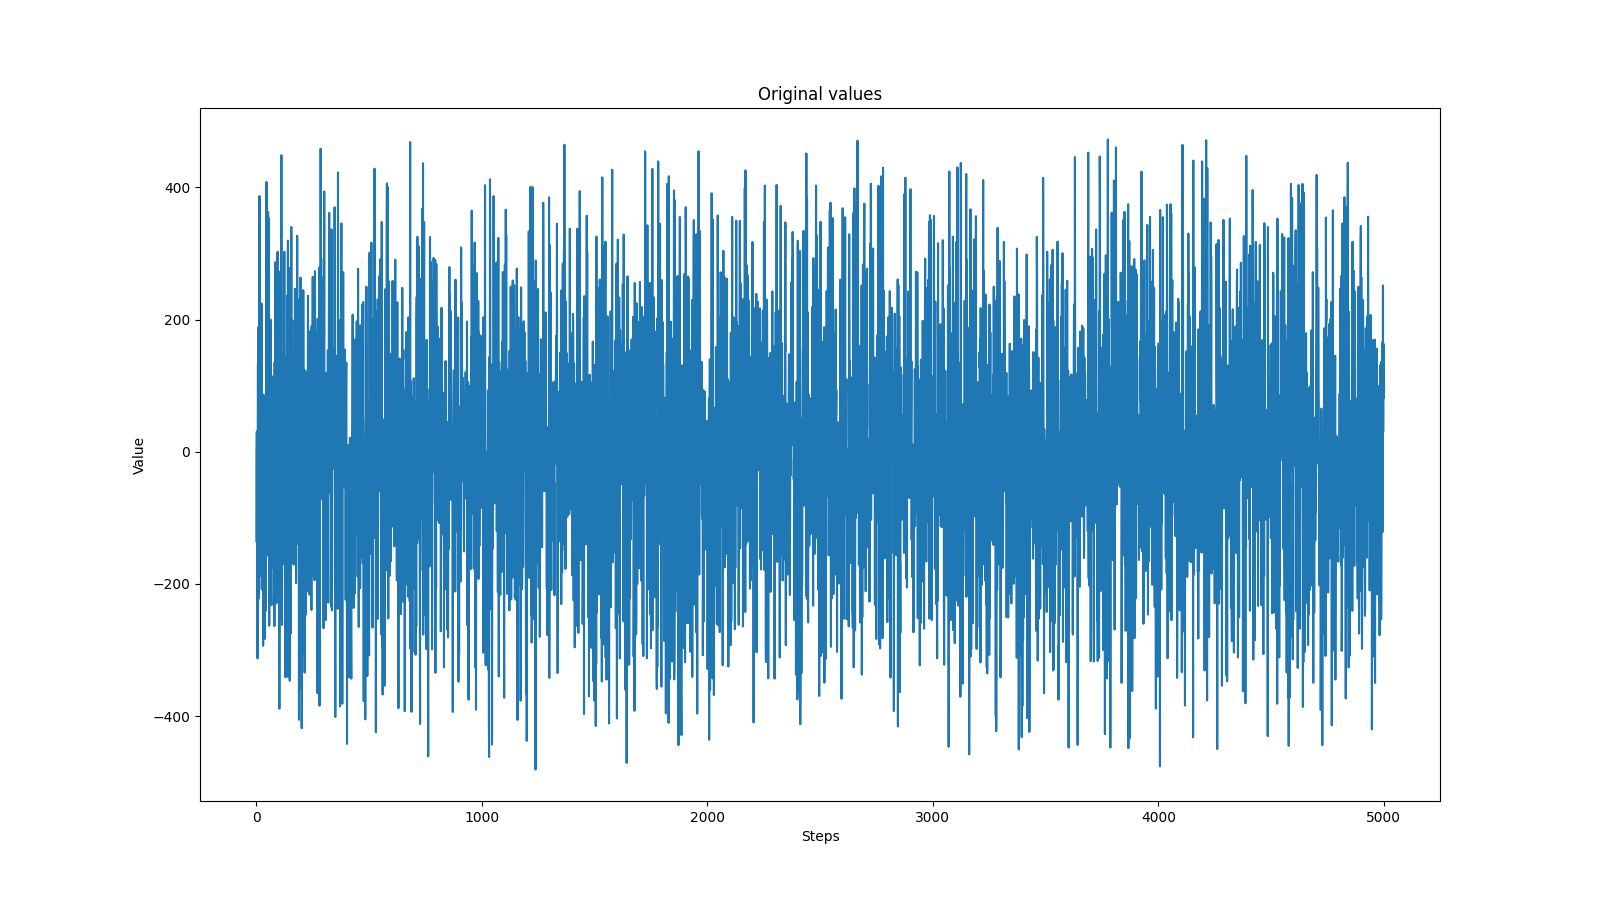

In [4]:
x, y = random_generator(5000)


plot(x, y, 'Original values')

{'mean': tensor(-2.4294), 'var': tensor(40893.8789), 'count': 5000}


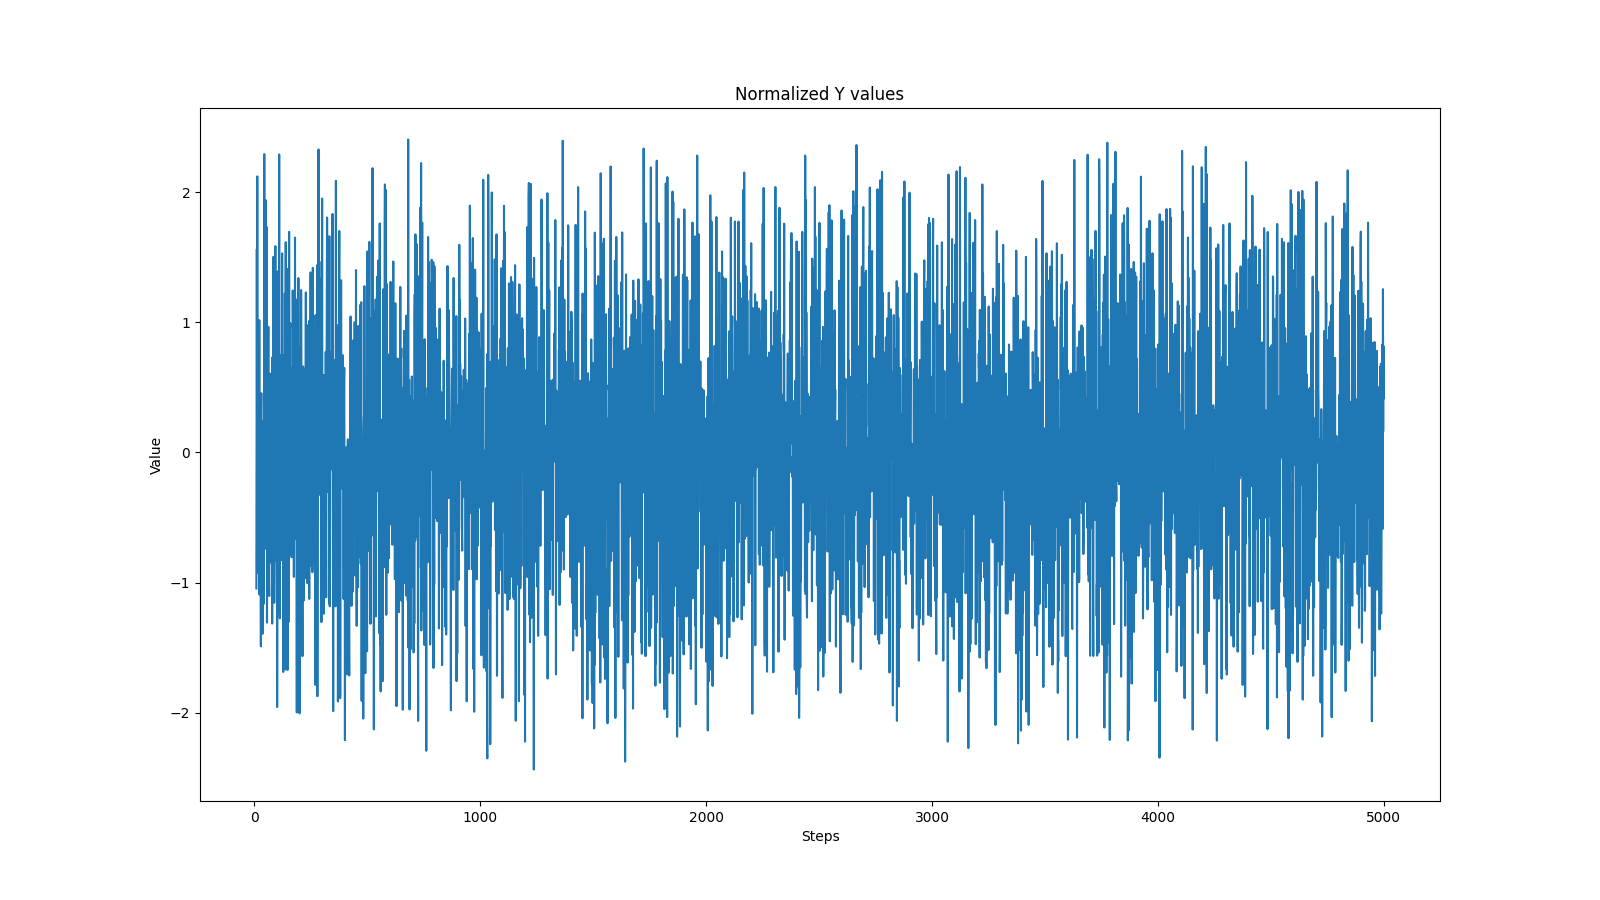

In [5]:
normalizer = RunningNormalizer()

batch_size = 2
normed_y = []

for i in range(0, len(y)-1, batch_size):
    values = y[i:i+batch_size]
    item = torch.tensor(values)

    normed_item = normalizer.normalize(item)
    normalizer.update(item)
    normed_y.extend(normed_item.tolist())

print(normalizer.state_dict())

offset = 10
plot(x[offset:], normed_y[offset:], 'Normalized Y values')

{'gain': tensor(0.0060), 'bias': tensor(-0.0075)}


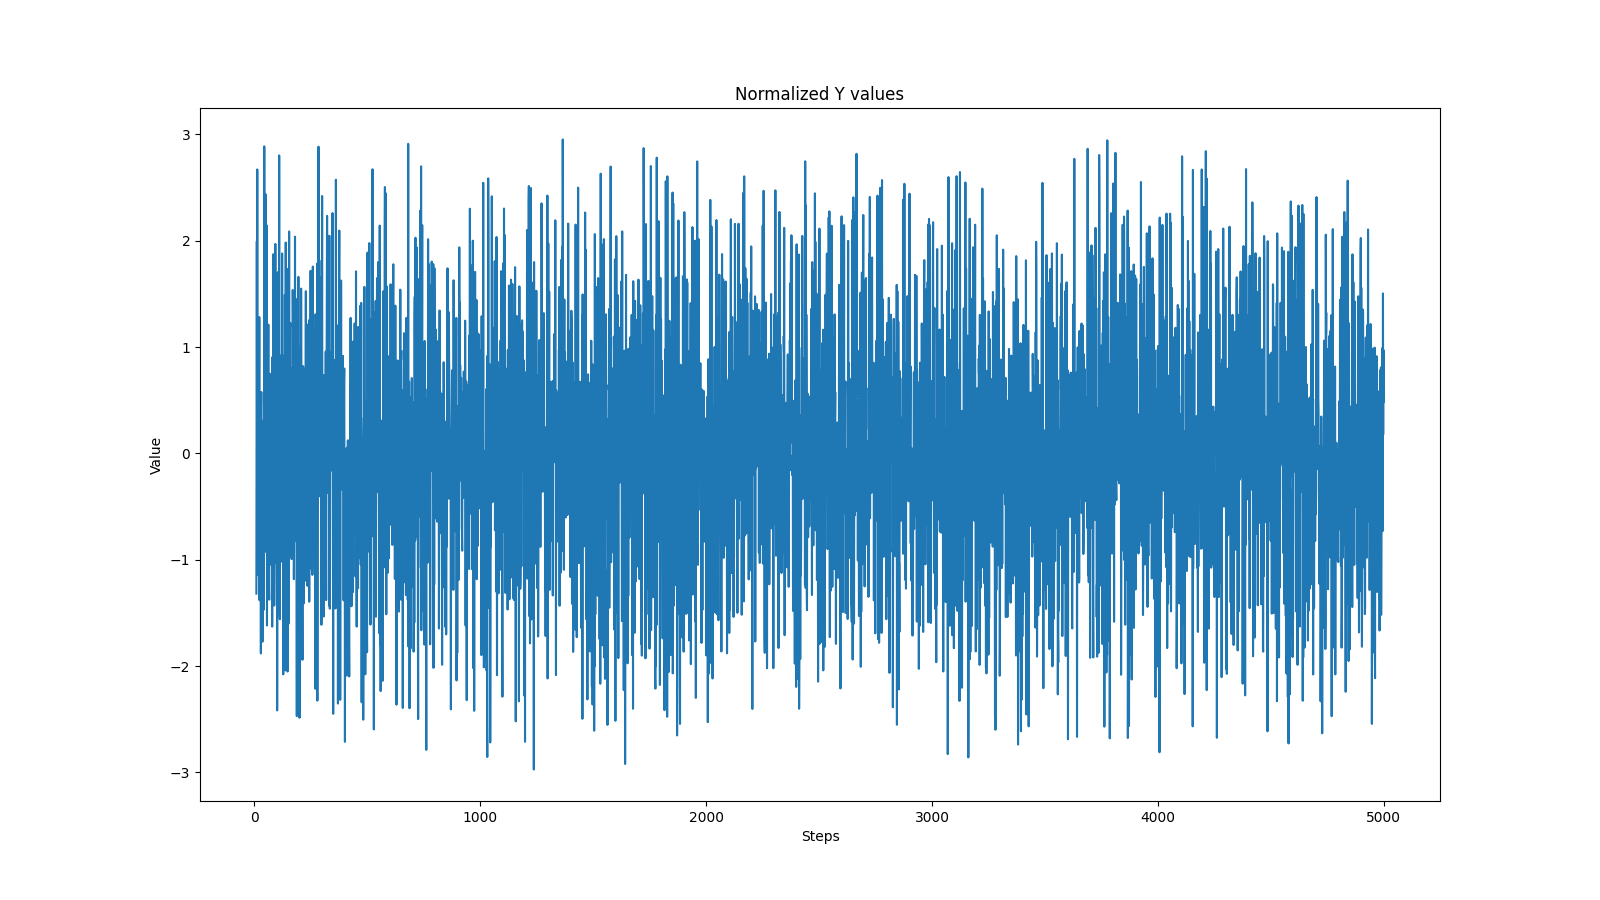

In [6]:
new_normalizer = Normalizer(target_mean=0, target_std=1.0, window_size=1000)

# tensor_y = torch.tensor(y)
# new_normalizer.update(tensor_y)
# new_normed_y = new_normalizer.normalize(tensor_y).tolist()


batch_size = 2
new_normed_y = []

for i in range(0, len(y)-1, batch_size):
    values = y[i:i+batch_size]
    item = torch.tensor(values)

    normed_item = new_normalizer.normalize(item)
    new_normalizer.update(item)
    new_normed_y.extend(normed_item.tolist())

print(new_normalizer.state_dict())

offset = 10
plot(x[offset:], new_normed_y[offset:], 'Normalized Y values')

In [7]:

def count_outliers(values, abs_max_val):
    assert abs_max_val > 0
    c = 0

    for v in values:
        if v > abs_max_val or v < -abs_max_val:
            c +=1

    return c


print(count_outliers(normed_y, 2))
print(count_outliers(new_normed_y, 2))

108
318
